# prediction model for profit of 50_startups data

In [148]:
from statsmodels.graphics.regressionplots import influence_plot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import MinMaxScaler
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt 
import statsmodels.api as sm 
import seaborn as sns
import pandas as pd 
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
sns.set_style(style='darkgrid')

In [149]:
# load dataset 
df = pd.read_csv('50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [150]:
# dataset have 50 observations 
# and 5 columns 
df.shape

(50, 5)

In [151]:
# only ['state'] column in categorical 
# other columns are of float dtype
# need to perform encoding 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [152]:
# there are NO null values present in dataset 
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [153]:
# 3 unique values present in 'State' column
df['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [154]:
# 'State' column of 'X' 
# not encoded yet
X = df[[i for i in df.columns if i != 'Profit']] # features
newY = df[['Profit']] # target (Profit)
X.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [155]:
# target(Profit)
newY.head()

,Profit
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [156]:
# 'State' column encoded by one-hot-encoding
newX = X.copy(deep=True).drop(['State'],axis=1)
newX = newX.join(pd.get_dummies(X['State']).drop(['Florida'],axis=1))
# renaming columns
newX.rename(columns={'California':'CA',
                     'New York':'NY',
                     'Marketing Spend':'Spend',
                     'Administration':'Adm',
                     'R&D Spend':'RnD'},inplace=True)
newX.head()

,RnD,Adm,Spend,CA,NY
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,1,0
2,153441.51,101145.55,407934.54,0,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,0,0


In [157]:
# dataset after encoding categorical column
# and renaming of columns
newData = newY.join(newX)
newData.head()

,Profit,RnD,Adm,Spend,CA,NY
0,192261.83,165349.20,136897.80,471784.10,0,1
1,191792.06,162597.70,151377.59,443898.53,1,0
2,191050.39,153441.51,101145.55,407934.54,0,0
3,182901.99,144372.41,118671.85,383199.62,0,1
4,166187.94,142107.34,91391.77,366168.42,0,0


In [158]:
def getEnc(st):
    return (df['State'] == st).astype('int')
def adj_r2_score(y_true,y_pred):
    n = len(newData)
    p = len(newData.columns)-1
    r2 = r2_score(y_true,y_pred)
    return 1-((1-r2)*(n-1)/(n-p-1))

# first model 

### without any transformations, influence diagnostics , treating multicollinearity if it exists and with constant 

In [159]:
model1 = smf.ols('Profit ~ RnD+Adm+Spend+CA+NY',
                 data=newData).fit()

In [160]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Wed, 02 Nov 2022   Prob (F-statistic):           1.34e-27
Time:                        20:29:34   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.032e+04   7251.767      6.940      0.000    3.57e+04    6.49e+04
RnD            0.8060      0.046     17.369      0.000       0.712       0.900
Adm           -0.0270      0.052     -0.517      0.608      -0.132       0.078
Spend          0.0270      0.017      1.574      0.123      -0.008       0.062
CA          -198.7888   3371.007     -0.059      0.953   -6992.607    6595.030
NY          -240.6758   3338.857     -0.072      0.943   -6969.701    6488.349
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.56e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

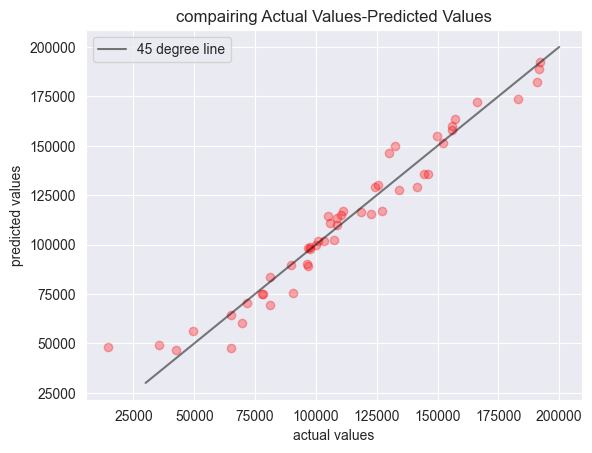

In [161]:
# compairing actual value - predicted values
plt.scatter(newY,model1.fittedvalues,
            color='red',
            alpha=0.3)
plt.plot([30000,200000],[30000,200000],
         color='black',
         alpha=0.5,
         label='45 degree line')
plt.title('compairing Actual Values-Predicted Values')
plt.xlabel('actual values')
plt.ylabel('predicted values')
plt.legend()
plt.show()

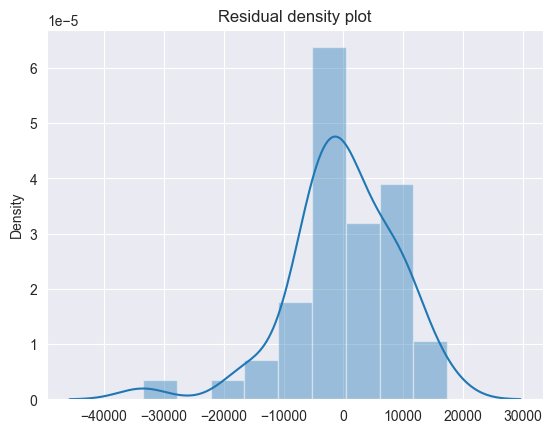

In [162]:
# residual density plot
# residual plot fairly normal distributed
sns.distplot(model1.resid)
plt.title('Residual density plot')
plt.show()

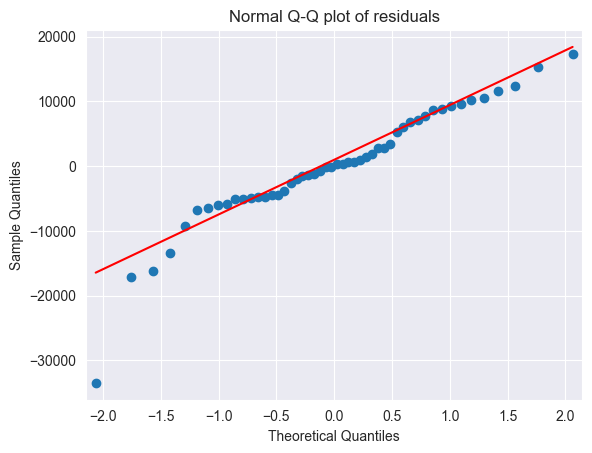

In [163]:
qqplot = sm.qqplot(model1.resid,line='q')
plt.title('Normal Q-Q plot of residuals')
plt.show()

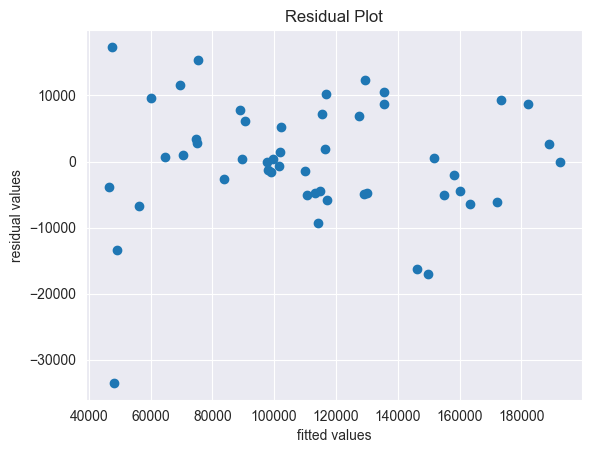

In [164]:
# perfect homoscedastic
plt.scatter(model1.fittedvalues,
            model1.resid)
plt.title('Residual Plot')
plt.xlabel('fitted values')
plt.ylabel('residual values')
plt.show()

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


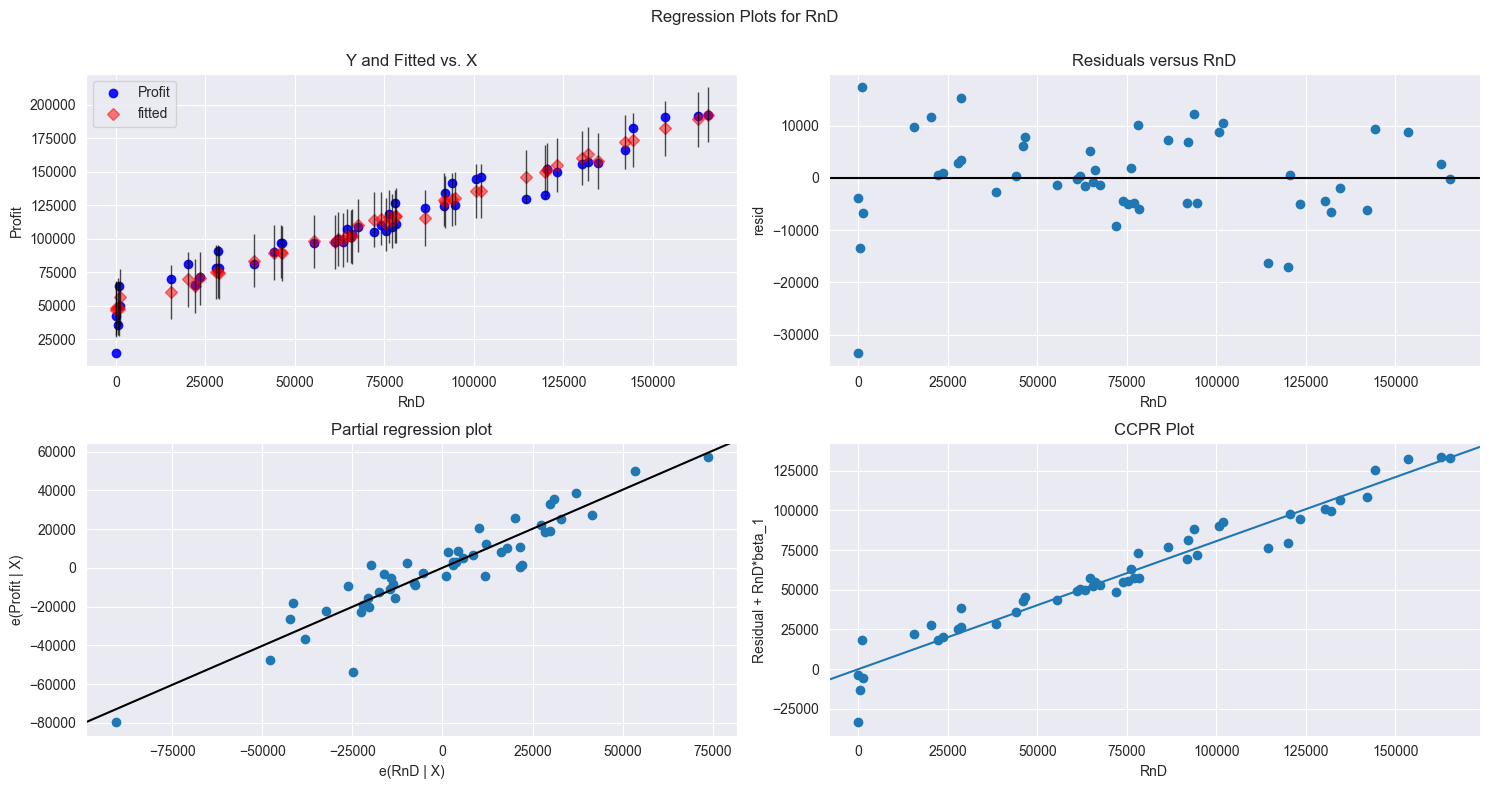

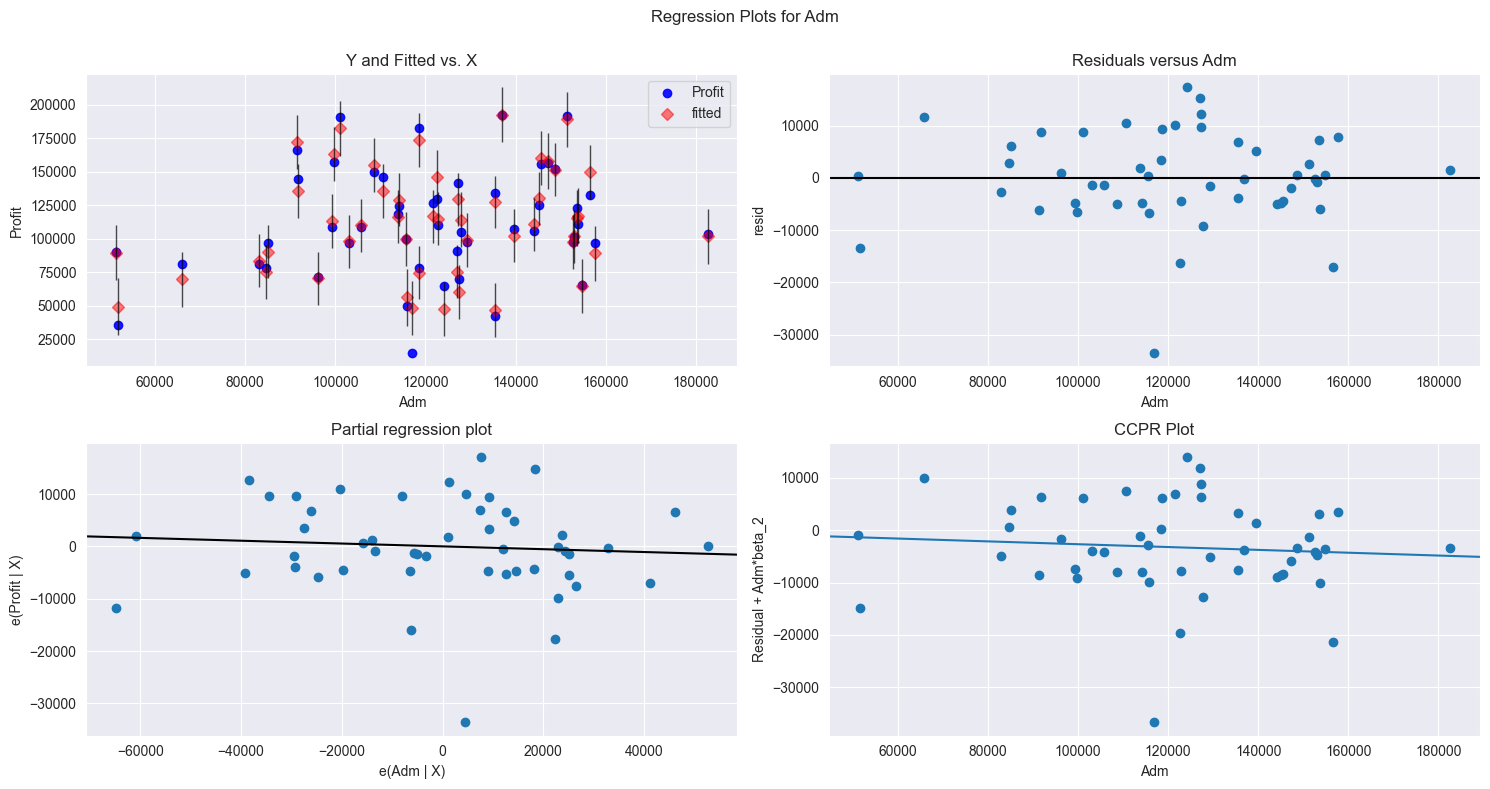

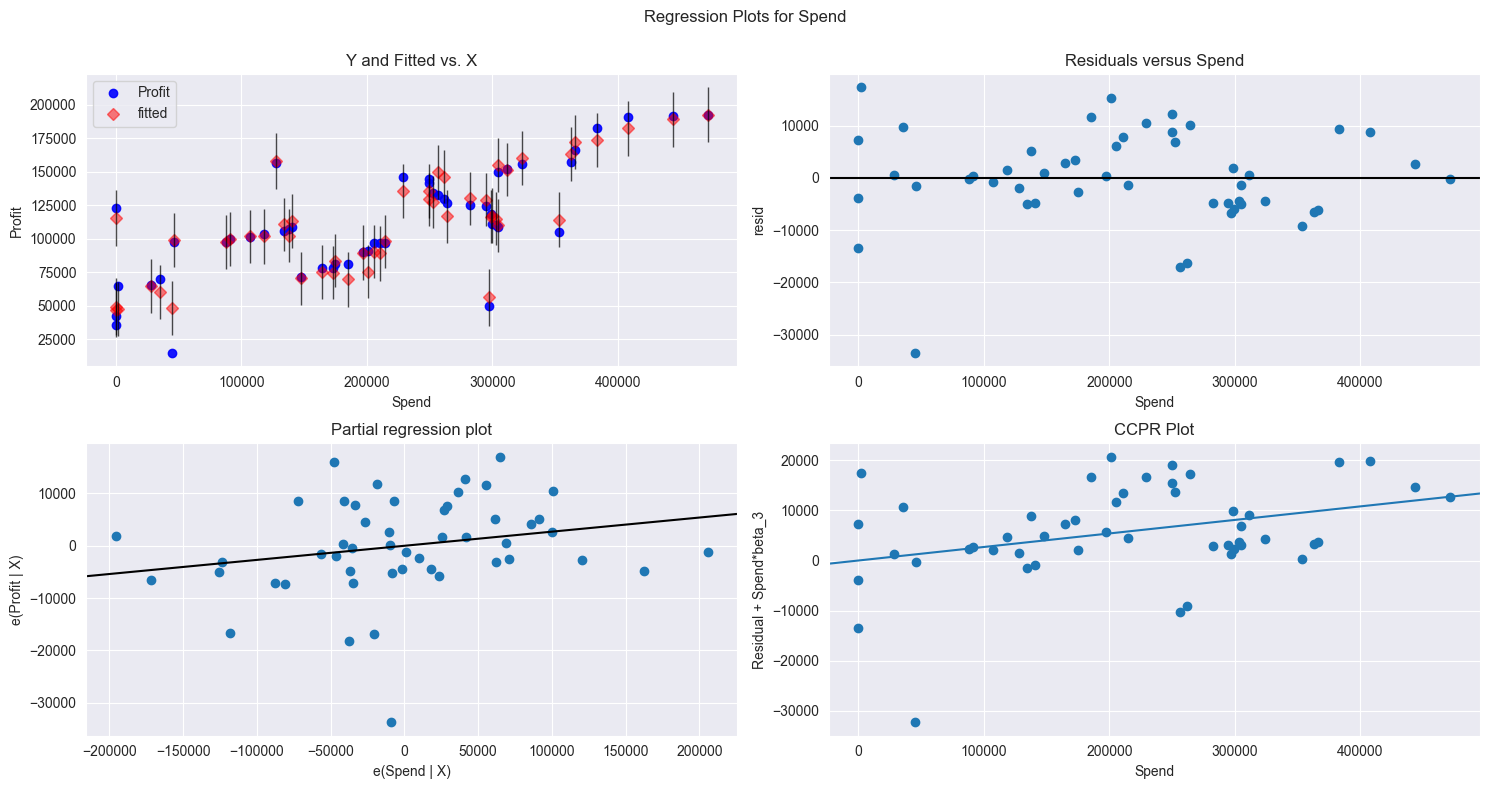

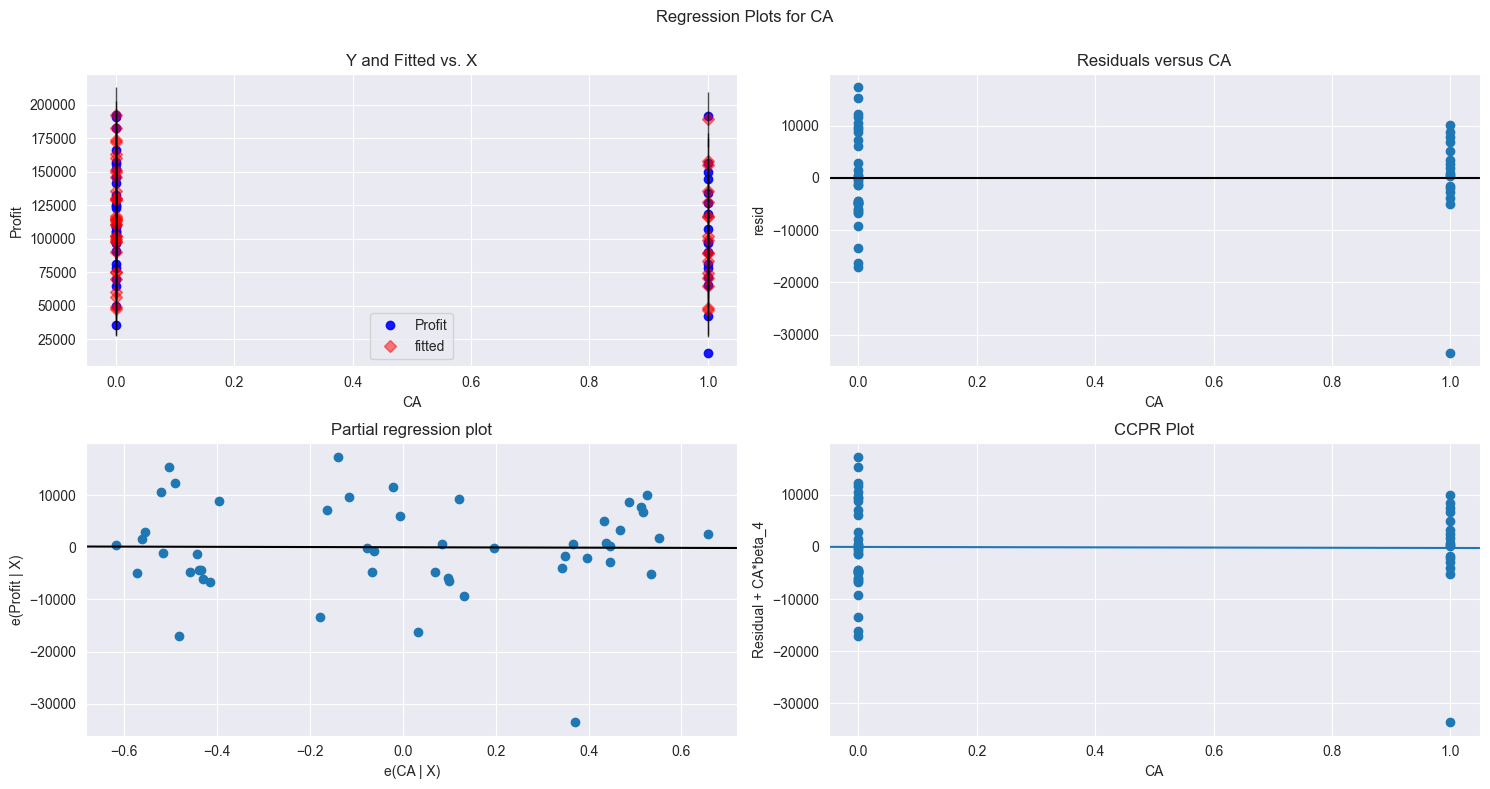

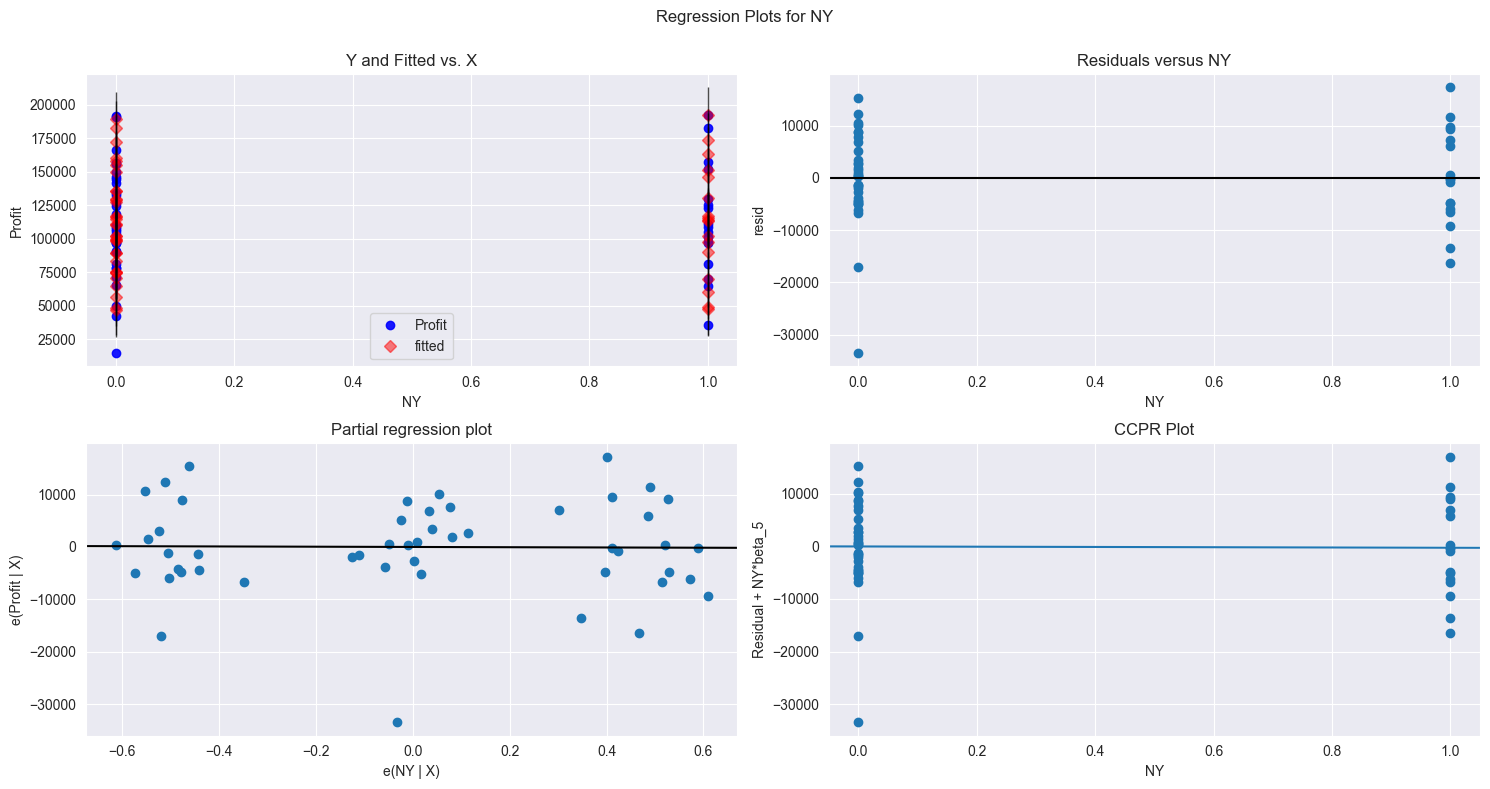

In [165]:
# multiple regression plots 
for col in [x for x in newData.columns if x != 'Profit']:
    fig = plt.figure(figsize=(15,8))
    fig = sm.graphics.plot_regress_exog(model1,
                                    col,
                                    fig=fig)
plt.show()

In [166]:
h1 = pd.DataFrame(model1.params)
h1.rename(columns={0:'Coeff'},inplace=True)
h1

,Coeff
Intercept,50324.132625
RnD,0.806023
Adm,-0.027004
Spend,0.026980
CA,-198.788793
NY,-240.675812


In [167]:
# y = eps + beta1*RnD + beta2*Adm + beta3*Spend + beta4*CA + beta5*NY
y_hat = 50324.132625 + (0.806023)*df['R&D Spend']+(-0.027004)*df['Administration']+(0.026980)*df['Marketing Spend']+(-198.788793)*getEnc('California')+(-240.675812)*getEnc('New York')

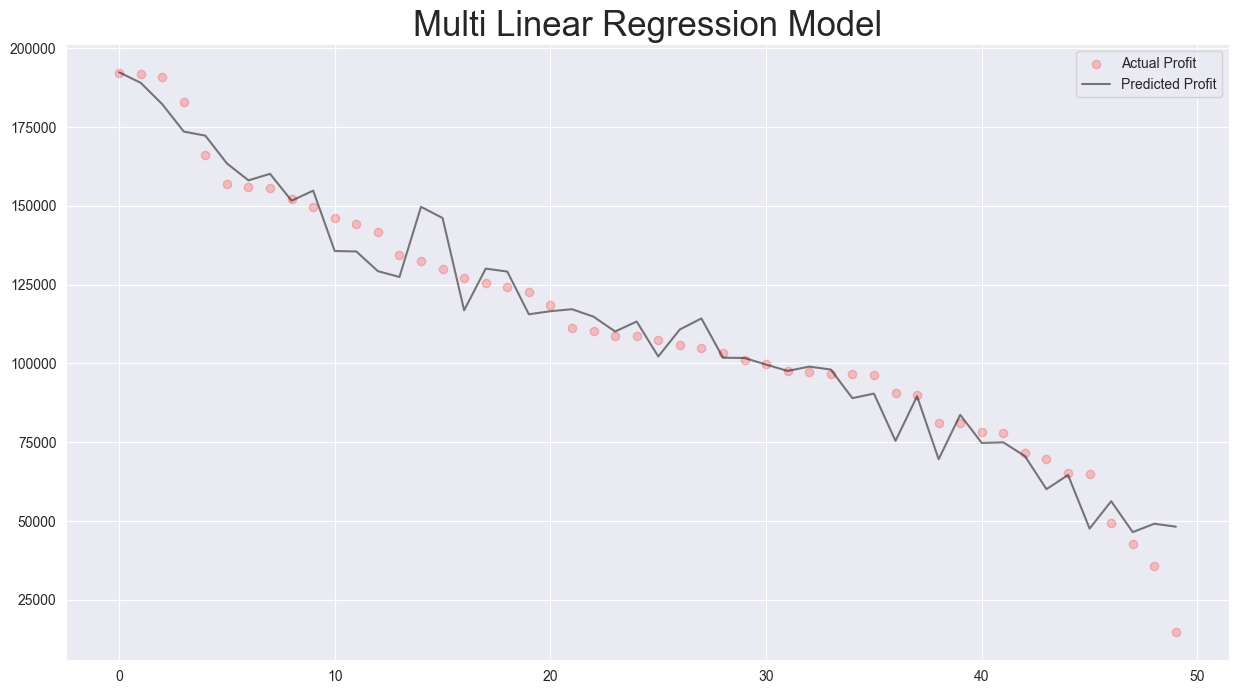

In [168]:
plt.figure(figsize=(15,8))
plt.scatter(df.Profit.index,df.Profit,
            color='red',alpha=0.2,label='Actual Profit')
plt.plot(y_hat,color='black',alpha=0.5,label='Predicted Profit')
plt.title('Multi Linear Regression Model',
          fontsize=25)
plt.legend()
plt.show()

## training accuracy of first model is 94.50 %

# second model 

### without any transformations, influence diagnostics , treating multicollinearity if it exists and without constant 

In [169]:
model2 = sm.OLS(newY.values,newX.values).fit()

In [170]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              765.9
Date:                Wed, 02 Nov 2022   Prob (F-statistic):                    2.49e-42
Time:                        20:29:39   Log-Likelihood:                         -543.87
No. Observations:                  50   AIC:                                      1098.
Df Residuals:                      45   BIC:                                      1107.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.7217      0.064     11.260      0.000       0.593       0.851
x2             0.2847      0.038      7.465      0.000       0.208       0.362
x3             0.0830      0.022      3.833      0.000       0.039       0.127
x4          7720.4710   4539.299      1.701      0.096   -1422.146    1.69e+04
x5          7126.6916   4530.146      1.573      0.123   -1997.491    1.63e+04
==============================================================================
Omnibus:                        0.862   Durbin-Watson:                   1.480
Prob(Omnibus):                  0.650   Jarque-Bera (JB):                0.929
Skew:                          -0.212   Prob(JB):                        0.628
Kurtosis:                       2.484   Cond. No.                     8.02e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 8.02e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [171]:
# adj r2 score 
adj_r2_score(newY.values,model2.predict())

0.8851300897778493

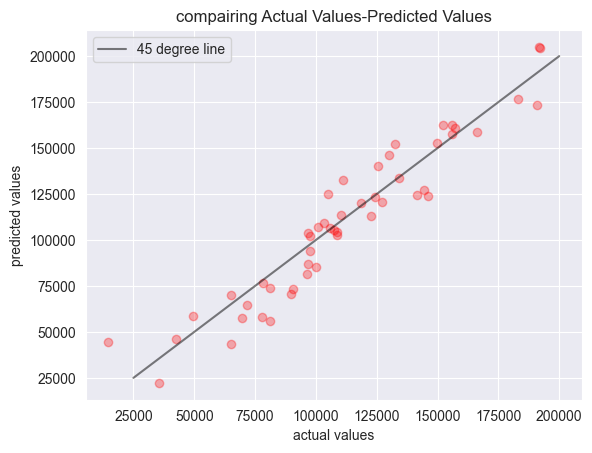

In [172]:
# compairing actual value - predicted values
plt.scatter(newY,model2.fittedvalues,
            color='red',
            alpha=0.3)
plt.plot([25000,200000],[25000,200000],
         color='black',
         alpha=0.5,
         label='45 degree line')
plt.title('compairing Actual Values-Predicted Values')
plt.xlabel('actual values')
plt.ylabel('predicted values')
plt.legend()
plt.show()

In [173]:
h2 = pd.DataFrame(model2.params)
h2.rename(columns={0:'Coeff'},inplace=True)
h2.index = newX.columns
h2

,Coeff
RnD,0.721657
Adm,0.284720
Spend,0.082968
CA,7720.471018
NY,7126.691633


In [174]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [175]:
# y = eps + beta1*RnD + beta2*Adm + beta3*Spend + beta4*CA + beta5*NY
y_hat = (0.721657)*df['R&D Spend'] + (0.0284720)*df['Administration'] + (0.082968)*df['Marketing Spend'] + (7720.471018)*getEnc('California') + (7126.691633)*getEnc('New York')

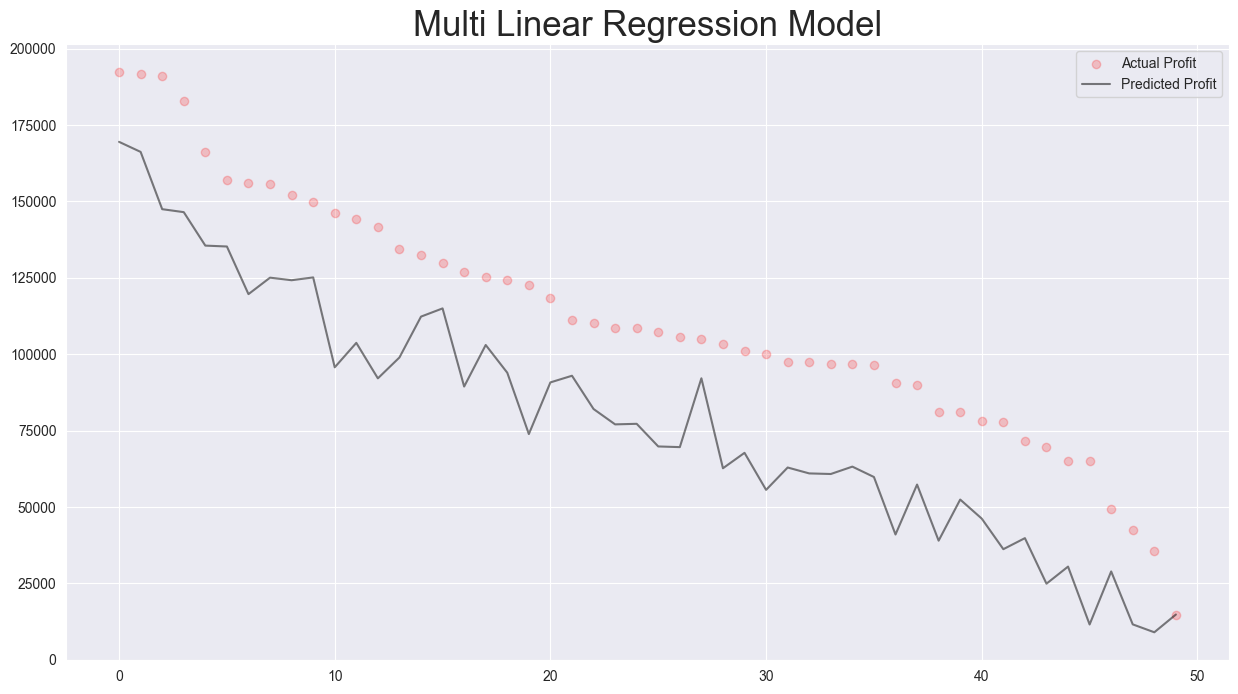

In [176]:
plt.figure(figsize=(15,8))
plt.scatter(df.Profit.index,df.Profit,
            color='red',alpha=0.2,label='Actual Profit')
plt.plot(y_hat,color='black',alpha=0.5,label='Predicted Profit')
plt.title('Multi Linear Regression Model',
          fontsize=25)
plt.legend()
plt.show()

##  training accuracy of second model is 88.51 %

# third model

In [177]:
# skewness of column data
# concluding -> no need to perform transformation
newX.iloc[:,:3].skew()

RnD      0.164002
Adm     -0.489025
Spend   -0.046472
dtype: float64

In [178]:
newX.head()

,RnD,Adm,Spend,CA,NY
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,1,0
2,153441.51,101145.55,407934.54,0,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,0,0


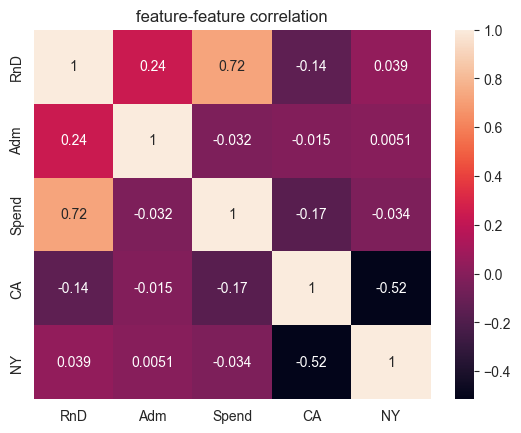

In [179]:
# inspecting feature-feature linear correlation
# check it later using VIF
sns.heatmap(newX.corr(),annot=True)
plt.title('feature-feature correlation')
plt.show()

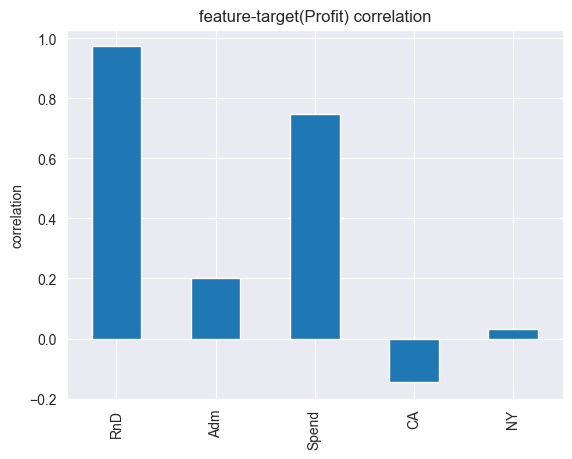

In [180]:
# feature-target(Profit) correlation
# RnD and Spend are highly correlated to Profit 
newX.join(df['Profit']).corr().iloc[:,-1][:-1].plot(kind='bar')
plt.title('feature-target(Profit) correlation')
plt.ylabel('correlation')
plt.show()

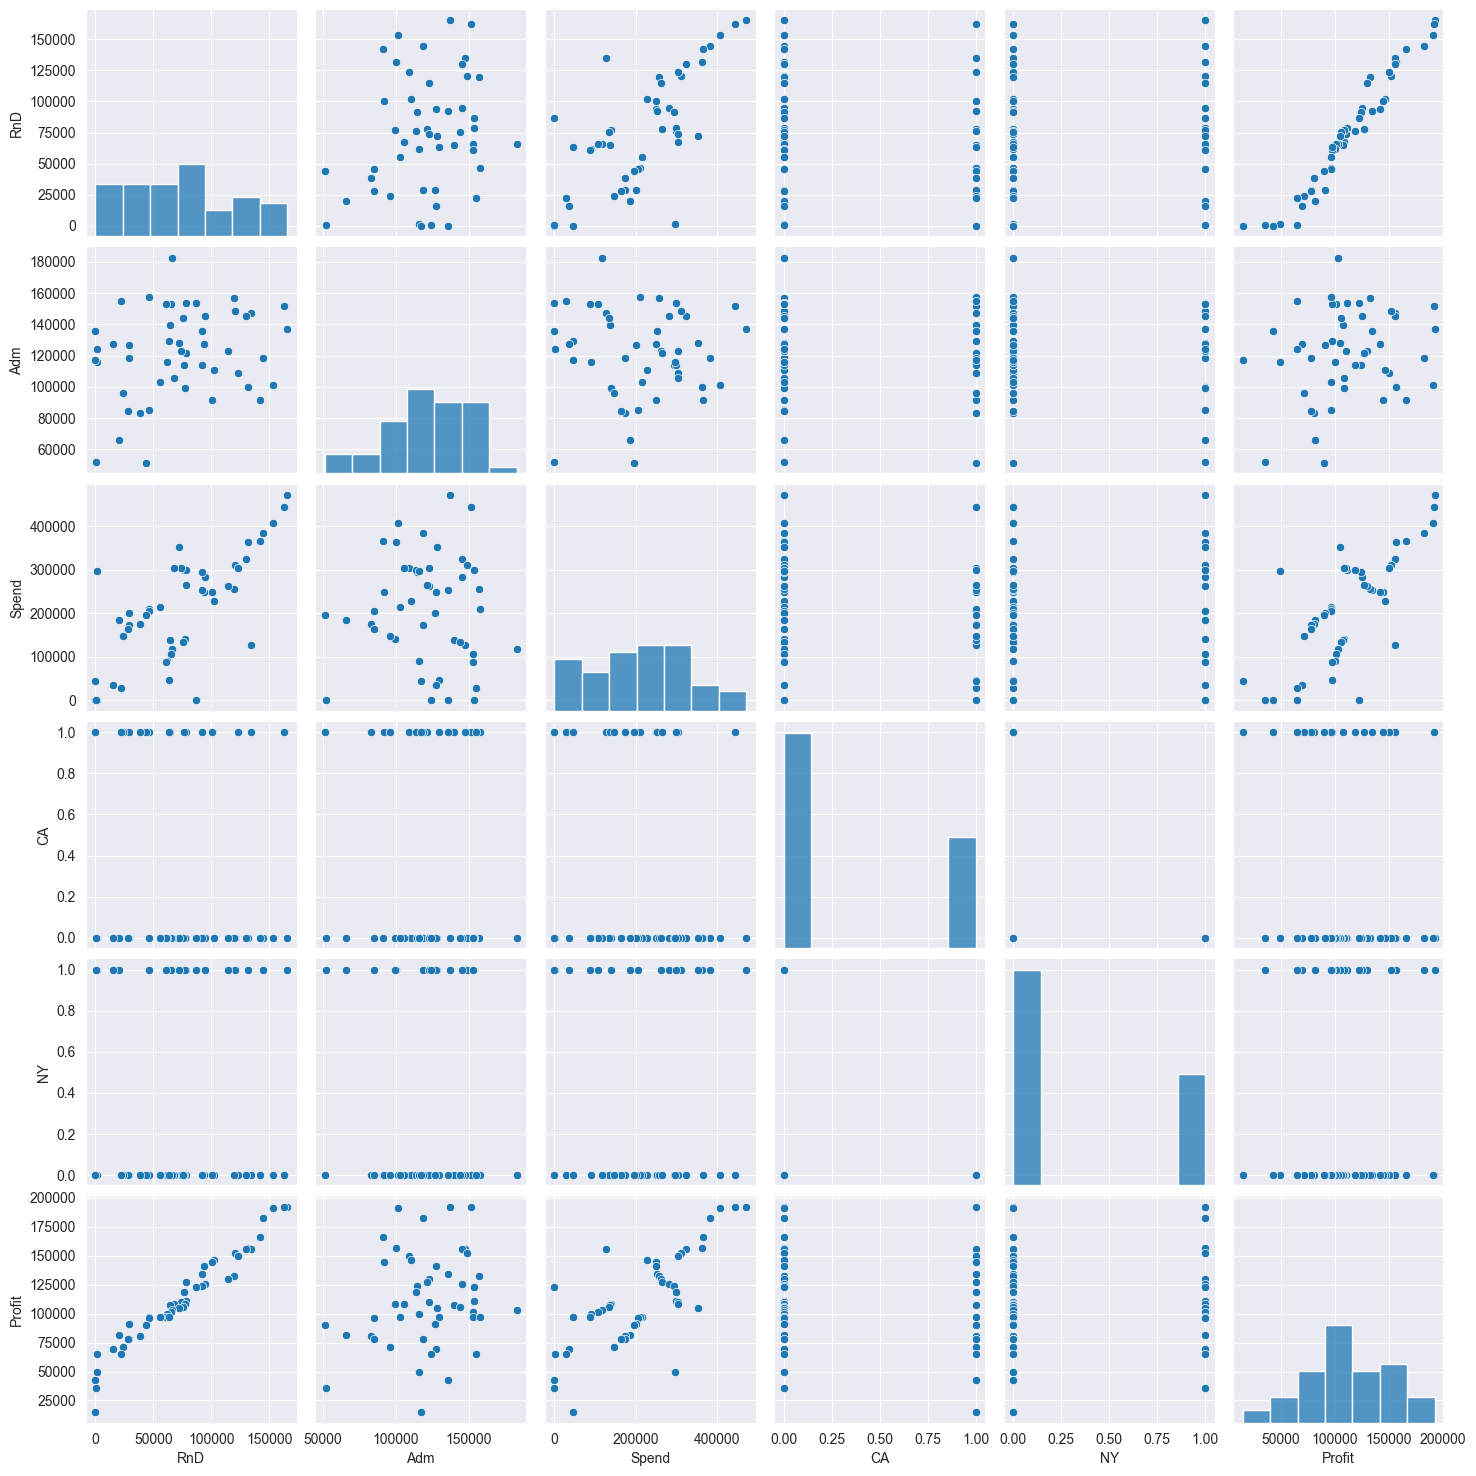

In [181]:
# plot pairplot 
# get overview of all data
sns.pairplot(newX.join(df['Profit']))
plt.show()

In [182]:
newX.head()

,RnD,Adm,Spend,CA,NY
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,1,0
2,153441.51,101145.55,407934.54,0,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,0,0


In [183]:
# linear regression model 
model3 = smf.ols('Profit~RnD+Adm+Spend+CA+NY',
                 data=newX.join(df['Profit'])).fit()

In [184]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Wed, 02 Nov 2022   Prob (F-statistic):           1.34e-27
Time:                        20:29:46   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.032e+04   7251.767      6.940      0.000    3.57e+04    6.49e+04
RnD            0.8060      0.046     17.369      0.000       0.712       0.900
Adm           -0.0270      0.052     -0.517      0.608      -0.132       0.078
Spend          0.0270      0.017      1.574      0.123      -0.008       0.062
CA          -198.7888   3371.007     -0.059      0.953   -6992.607    6595.030
NY          -240.6758   3338.857     -0.072      0.943   -6969.701    6488.349
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.56e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

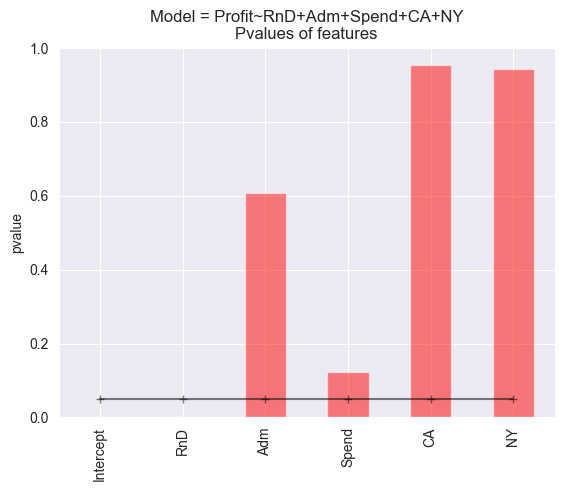

In [185]:
# pvalues of ['Adm','Spend','CA','NY'] are greater than alpha 
# indicates they are redundant feature
model3.pvalues.plot(kind='bar',
                    alpha=0.5,
                    color='red',
                    label='pvalue')
plt.plot(model3.pvalues.index,
         [0.05 for i in range(len(model3.pvalues))],
         color='black',
         marker='+',
         label='alpha = 0.05',
         alpha=0.5)
plt.ylabel('pvalue')
plt.title('Model = Profit~RnD+Adm+Spend+CA+NY\nPvalues of features')
plt.show()

In [186]:
# checking for multicollinearty using VIF
row = []
for col in newX.columns:
    formula = col+'~'+'+'.join([i for i in newX.columns if i != col])
    checkVIF = smf.ols(formula,
                       data=newX).fit().rsquared
    row.append([col,round(1/(1-checkVIF),2)])
pd.DataFrame(row,columns=['Variable','VIF'])

,Variable,VIF
0,RnD,2.50
1,Adm,1.18
2,Spend,2.42
3,CA,1.43
4,NY,1.40


### there exists no multicollinearity 

In [187]:
# making model by dropping features with pvalue>alpha
newModel3 = smf.ols('Profit~RnD',data=newX.join(df['Profit'])).fit()

In [188]:
# pvalue of feature 'RnD' is 0
newModel3.pvalues

Intercept    2.782697e-24
RnD          3.500322e-32
dtype: float64

In [189]:
# r2 score value 
newModel3.rsquared

0.9465353160804392

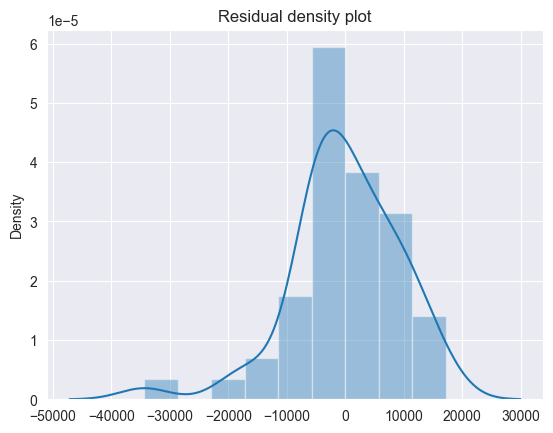

In [190]:
# residual density plot is fairly normally distributed 
# satisfies assumption about linear regression
sns.distplot(newModel3.resid)
plt.title('Residual density plot')
plt.show()

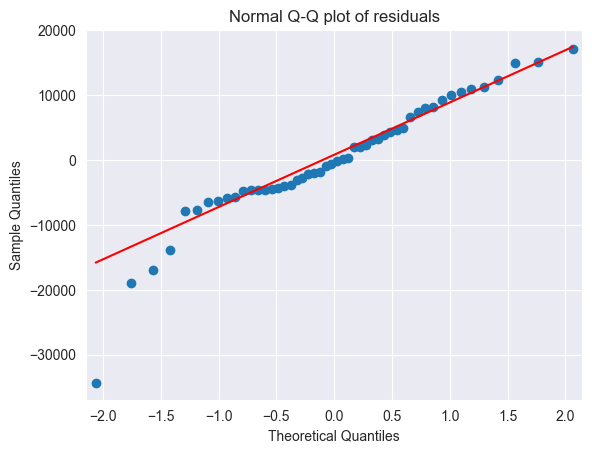

In [191]:
# data peaked in the middle
qqplot = sm.qqplot(newModel3.resid,line='q')
plt.title('Normal Q-Q plot of residuals')
plt.show()

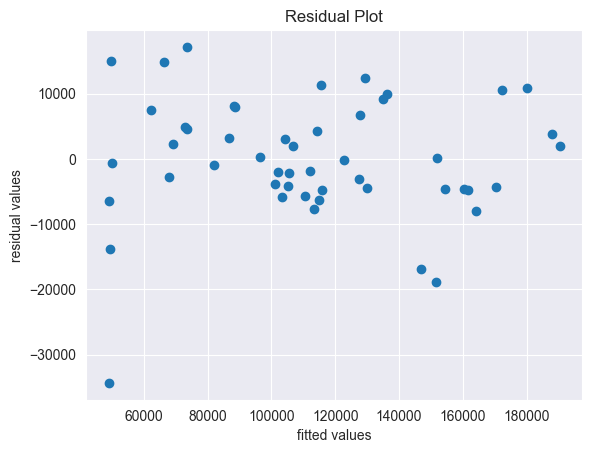

In [192]:
# homoscedasticity satisfied ! 
plt.scatter(newModel3.fittedvalues,
            newModel3.resid)
plt.title('Residual Plot')
plt.xlabel('fitted values')
plt.ylabel('residual values')
plt.show()

eval_env: 1


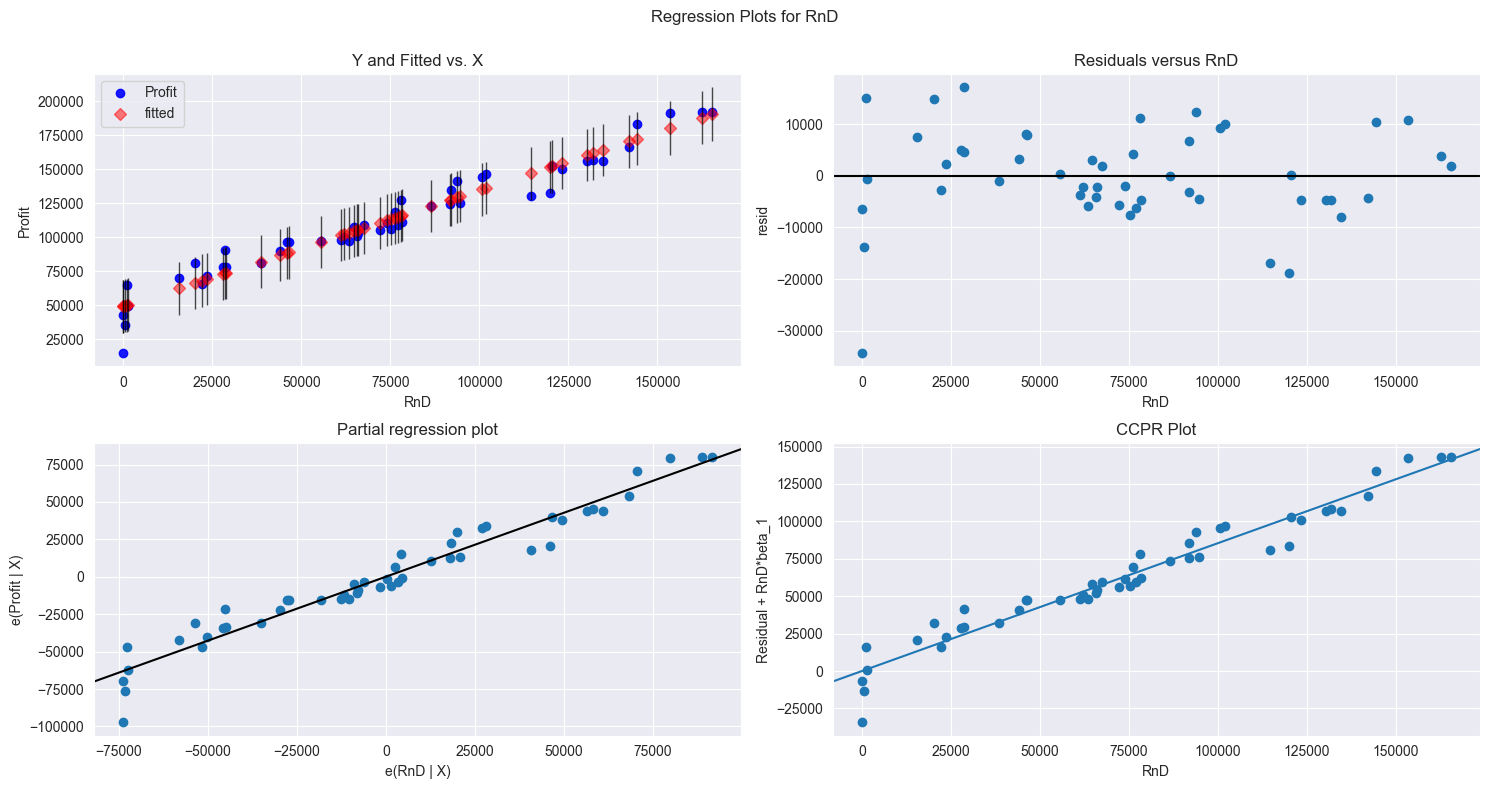

In [193]:
# regression plots 
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(newModel3,
                                    'RnD',
                                    fig=fig)
plt.show()

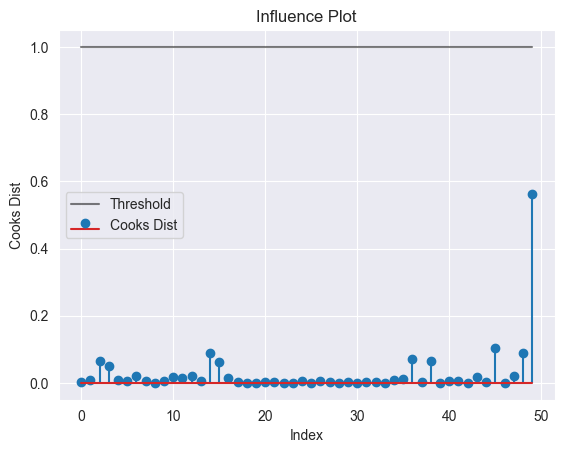

In [194]:
# no influential data points present
model_inf = newModel3.get_influence()
c, _ = model_inf.cooks_distance
plt.stem(np.arange(len(c)),
         np.round(c,3),
         label='Cooks Dist')
plt.plot(np.arange(len(c)),
         [1 for i in range(len(c))],
         color='black',
         alpha=0.5,
         label='Threshold')
plt.title('Influence Plot')
plt.ylabel('Cooks Dist')
plt.xlabel('Index')
plt.legend()
plt.show()

In [195]:
# final model 
newModel3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Wed, 02 Nov 2022   Prob (F-statistic):           3.50e-32
Time:                        20:29:48   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
RnD            0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

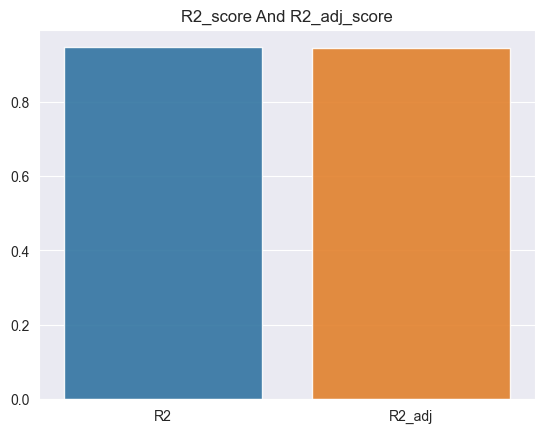

In [196]:
# compairing r2_score and r2_adjusted_score
sns.barplot(['R2','R2_adj'],
            [newModel3.rsquared,newModel3.rsquared_adj],
            alpha=0.9)
plt.title('R2_score And R2_adj_score')
plt.show()

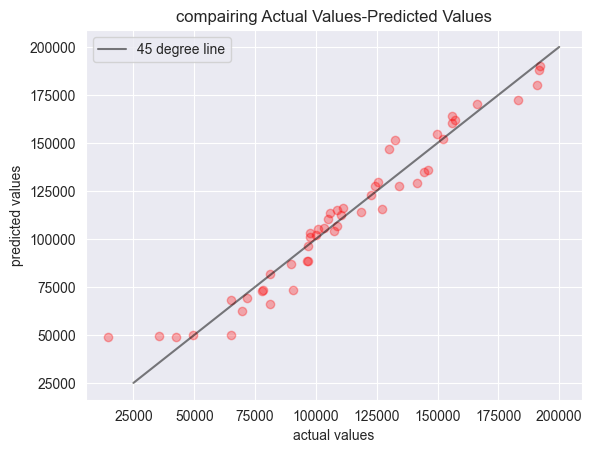

In [197]:
# compairing actual values- predicted values
plt.scatter(df['Profit'],newModel3.fittedvalues,
            color='red',
            alpha=0.3)
plt.plot([25000,200000],[25000,200000],
         color='black',
         alpha=0.5,
         label='45 degree line')
plt.legend()
plt.xlabel('actual values')
plt.ylabel('predicted values')
plt.title('compairing Actual Values-Predicted Values')
plt.show()

In [198]:
h = pd.DataFrame(newModel3.params)
h.rename(columns={0:'Coeff'},inplace=True)
h

,Coeff
Intercept,49032.899141
RnD,0.854291


In [199]:
# y = eps + beta1*RnD
y_hat = 49032.899141 + (0.854291)*df['R&D Spend']

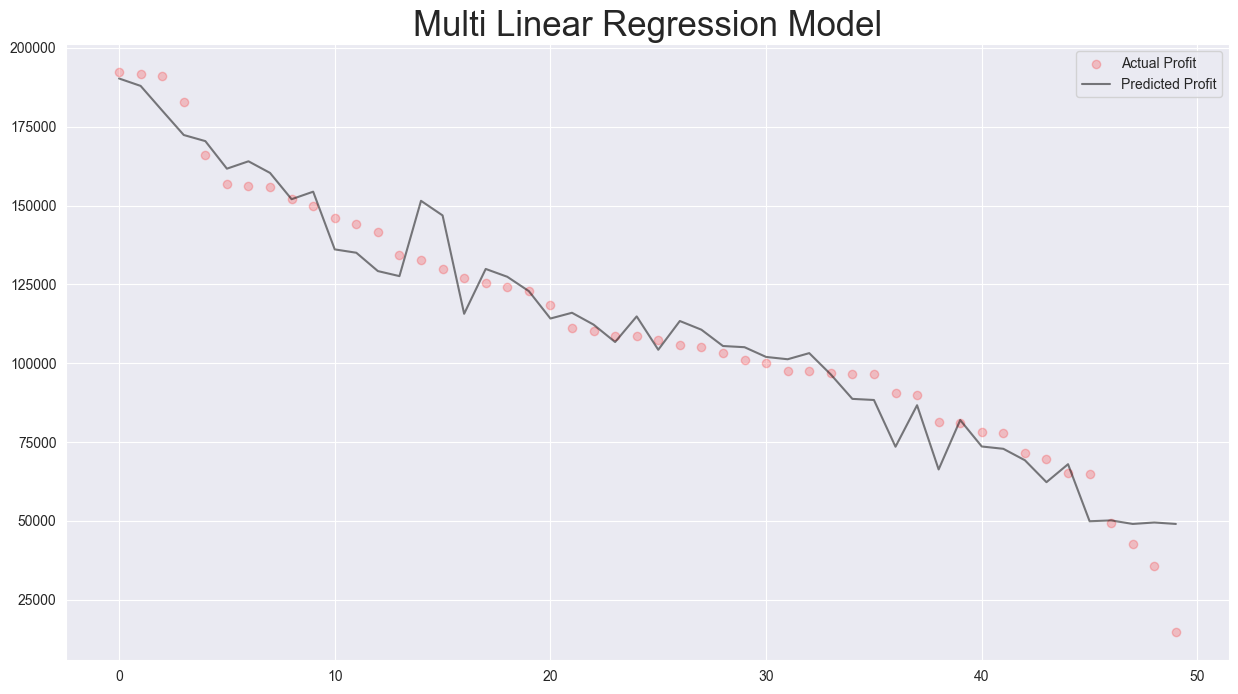

In [200]:
plt.figure(figsize=(15,8))
plt.scatter(df.Profit.index,df.Profit,
            color='red',alpha=0.2,label='Actual Profit')
plt.plot(y_hat,color='black',alpha=0.5,label='Predicted Profit')
plt.title('Multi Linear Regression Model',
          fontsize=25)
plt.legend()
plt.show()

## Training accuracy of third model is 94.65 %

In [201]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Wed, 02 Nov 2022   Prob (F-statistic):           1.34e-27
Time:                        20:29:50   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.032e+04   7251.767      6.940      0.000    3.57e+04    6.49e+04
RnD            0.8060      0.046     17.369      0.000       0.712       0.900
Adm           -0.0270      0.052     -0.517      0.608      -0.132       0.078
Spend          0.0270      0.017      1.574      0.123      -0.008       0.062
CA          -198.7888   3371.007     -0.059      0.953   -6992.607    6595.030
NY          -240.6758   3338.857     -0.072      0.943   -6969.701    6488.349
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.56e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [202]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              765.9
Date:                Wed, 02 Nov 2022   Prob (F-statistic):                    2.49e-42
Time:                        20:29:50   Log-Likelihood:                         -543.87
No. Observations:                  50   AIC:                                      1098.
Df Residuals:                      45   BIC:                                      1107.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.7217      0.064     11.260      0.000       0.593       0.851
x2             0.2847      0.038      7.465      0.000       0.208       0.362
x3             0.0830      0.022      3.833      0.000       0.039       0.127
x4          7720.4710   4539.299      1.701      0.096   -1422.146    1.69e+04
x5          7126.6916   4530.146      1.573      0.123   -1997.491    1.63e+04
==============================================================================
Omnibus:                        0.862   Durbin-Watson:                   1.480
Prob(Omnibus):                  0.650   Jarque-Bera (JB):                0.929
Skew:                          -0.212   Prob(JB):                        0.628
Kurtosis:                       2.484   Cond. No.                     8.02e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 8.02e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [203]:
newModel3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Wed, 02 Nov 2022   Prob (F-statistic):           3.50e-32
Time:                        20:29:50   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
RnD            0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [204]:
pd.DataFrame([['model 1',model1.rsquared],
              ['model 2',r2_score(newY.values,model2.predict())],
              ['model 3',newModel3.rsquared]],columns=['Model','R2 Score'])

,Model,R2 Score
0,model 1,0.950752
1,model 2,0.896852
2,model 3,0.946535


## accuracy of model1 and model3 are almost same. 

## but model1 is more complex than model3. 

## so we will select model3 as our final model3.